# FluxCourse MODIS section

## Introduction

In this section we will learn how to use MODIS data from ORNL DAAC Fixed sites subset: https://modis.ornl.gov/data.html.

## Logistics
We use Jupyter Notebook for this practice. Remember to install the packages using "conda install [package-name]" in your command line. Before the course, remember to update your conda (if you use anaconda) by "conda update conda".
You will need the following packages:

* matplotlib
* numpy
* scipy

In [1]:
# Always start with loading the packages needed
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Pandas is quite useful when reading csv files with columns of different types
evifile = '/Users/xiyang/Desktop/FluxCourse/MODIS/250m_16_days_NDVI.csv'
EVItable= pd.read_csv(evifile, sep=',', header=None)


In [3]:
# First we want to create a timestamp in terms of day of year since some distant past
# These timestamps are usually strings to begin with, and we need to extrac the year,
# and day of year
timetemp = EVItable.iloc[:,2]
yeartemp = np.asarray([int(x[1:5]) for x in timetemp])
doytemp  = np.asarray([int(x[5:8]) for x in timetemp])
timestamp= np.empty(len(yeartemp),dtype='datetime64[s]')
for ii in range(len(yeartemp)):
    timestamp[ii] = dt.date(yeartemp[ii],1,1) + dt.timedelta(days = (int(doytemp[ii]) -1))

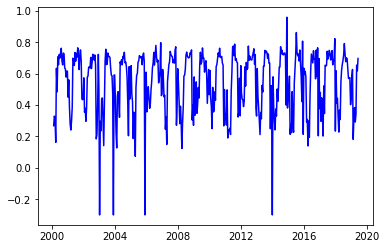

In [4]:
# plot the center pixel ID:545 and should be column 549 since there are 5 columns at the 
# beginning of the table and it is a zero-based subscript system
# multiply it by 0.0001 from the raw EVI table. 
EVI_centerpixel    = EVItable.iloc[:,549] * 0.0001
dates              = matplotlib.dates.date2num(timestamp)
plt.plot_date(dates, EVI_centerpixel, 'b-')

### The importance of quality control

MODIS provide information on the quality of each pixel based on various criteria. For the ORNL DAAC Fixed Site data we use, there is a quality-controlled version you can use.

Let's take a look and see what is the difference between the raw data and the quality-controlled one.

In [5]:
# Read qc files
evi_afterqc_file = '/Users/xiyang/Desktop/FluxCourse/MODIS/filtered_scaled_250m_16_days_NDVI.csv'
evi_postqc_table = pd.read_csv(evi_afterqc_file, sep=',', header=None)

In [6]:
timetemp1 = evi_postqc_table.iloc[:,2]
yeartemp1 = np.asarray([int(x[1:5]) for x in timetemp1])
doytemp1  = np.asarray([int(x[5:8]) for x in timetemp1])
timestamp1= np.empty(len(yeartemp1),dtype='datetime64[s]')
for jj in range(len(yeartemp1)):
    timestamp1[jj] = dt.date(yeartemp1[jj],1,1) + dt.timedelta(days = (int(doytemp1[jj]) -1))

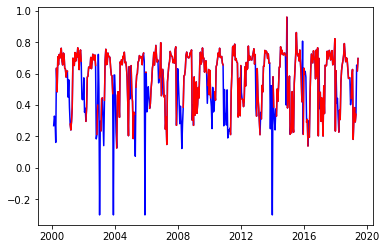

In [7]:
evitmp             = evi_postqc_table.iloc[:,549]
EVIqctmp           = evitmp.replace('F',np.nan)
EVIqc_centerpixel  = EVIqctmp.astype(float)
dates1             = matplotlib.dates.date2num(timestamp1)
plt.plot_date(dates, EVI_centerpixel, 'b-')
plt.plot_date(dates1, EVIqc_centerpixel, 'r-')

### Plot statistics

Sometimes you want to take a look at the seasonality, mean monthly values etc. Here I provide some tools for you to use.

**Let's start with plotting the seasonal patterns of EVI**

<function matplotlib.pyplot.show(*args, **kw)>

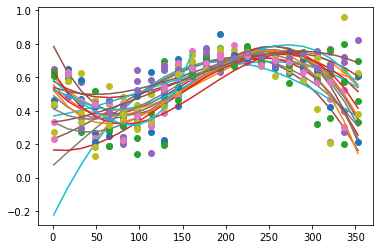

In [8]:
unique_years = np.unique(yeartemp1)

for kk in range(len(unique_years)):
    data_subscript = (yeartemp1 == unique_years[kk])
    #sg_data        = savgol_filter(EVIqc_centerpixel[data_subscript],3,1)
    XX             = doytemp1[data_subscript]
    YY             = EVIqc_centerpixel[data_subscript];
    poly = np.polyfit(XX[~np.isnan(YY)],YY[~np.isnan(YY)],3)
    poly_y = np.poly1d(poly)(doytemp1[data_subscript])
    plt.plot(doytemp1[data_subscript],EVIqc_centerpixel[data_subscript],'o')
    plt.plot(doytemp1[data_subscript],poly_y,'-')

#plt.legend(unique_years.astype('str'))
plt.show

**How about monthly mean and variance?**

<ErrorbarContainer object of 3 artists>

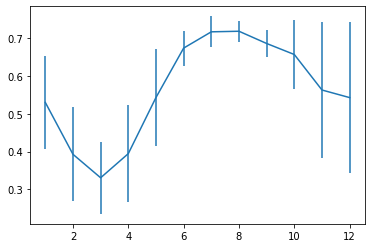

In [21]:
VImean = np.empty(12)
VIstd  = np.empty(12)
for month_i in range(12):
    
    month_lb = dt.date(2000,month_i+1,1).timetuple().tm_yday
    if month_i+2 > 12:
        month_ub = 365
    else:
        month_ub = dt.date(2000,month_i+2,1).timetuple().tm_yday
    
    data_sub = (doytemp1 >= month_lb) & (doytemp1 < month_ub)
    
    VImean[month_i]   = np.nanmean(EVIqc_centerpixel[data_sub])
    VIstd[month_i]   = np.nanstd(EVIqc_centerpixel[data_sub])

plt.errorbar(range(1,13),VImean,VIstd)
    

In [15]:
dt.date(yeartemp1[1],month_i+1,1).timetuple().tm_yday

1